In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import csv 

In [2]:
# Reference csv files to analyze
qbs = 'C:\\Users\\phili\\Downloads\\2018QBs.csv'
plays = 'C:\\Users\\phili\\Downloads\\2018Plays.csv'

In [3]:
# create dataframes for Quarterbacks and defensive formations
qb_df =pd.read_csv(qbs)
plays_df =pd.read_csv(plays)

In [4]:
# review qb df for any null vlaues
qb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        71 non-null     int64 
 1   height       71 non-null     object
 2   weight       71 non-null     int64 
 3   birthDate    71 non-null     object
 4   collegeName  71 non-null     object
 5   position     71 non-null     object
 6   displayName  71 non-null     object
dtypes: int64(2), object(5)
memory usage: 4.0+ KB


In [5]:
# View first 3 entries of the qb dataframe
qb_df.head(3)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2532842,78,243,1/20/1989,Arizona,QB,Nick Foles
1,310,76,217,5/17/1985,Boston College,QB,Matt Ryan
2,2558191,74,225,5/4/1994,Pittsburgh,QB,Nathan Peterman


In [6]:
# Isolate Patrick Mahomes as he will be the focus of the capstone
qb_kc = qb_df[qb_df['displayName'] == 'Patrick Mahomes']

In [7]:
# review plays df for any null values
plays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [8]:
# # Review Def PI column for number of times pass interfernce occurred
plays_df['isDefensivePI'].value_counts()

False    18980
True       259
Name: isDefensivePI, dtype: int64

Pass Interference occurred on .001 percent of plays, this column is negligible due to its lack of generating in impact on the datas.

In [9]:
# penaltyJerseyNumbers and penaltyCodes have data on less than 10% of the plays, remove these columns
plays_df.drop(columns= ['penaltyJerseyNumbers', 'penaltyCodes','isDefensivePI'], inplace= True)

In [10]:
# create a subset of the columns containing null values and inspect their impact on the data
plays_1 = plays_df[['passResult',  "yardlineSide", "offenseFormation", "personnelO", "defendersInTheBox", 
                   "numberOfPassRushers", "personnelD", "typeDropback"]]
plays_1.head()

,passResult,yardlineSide,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback
0,C,ATL,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL
1,I,PHI,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL
2,I,PHI,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL
3,C,PHI,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT
4,I,PHI,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL


In [11]:
# Observe the two results will null values from the pass result category, 
# we will drop these 2 observations due to multiple pieces of missing information
plays_1[plays_1['passResult'].isnull()  == True]

,passResult,yardlineSide,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback
18777,NaN,DEN,SINGLEBACK,"2 RB, 2 TE, 1 WR",7.0,NaN,"4 DL, 3 LB, 4 DB",NaN
18855,NaN,CLE,PISTOL,"1 RB, 1 TE, 3 WR",6.0,NaN,"4 DL, 2 LB, 5 DB",NaN


In [12]:
# Given the number of null values is less than 3% for both defendersInTheBox and numberOfPassRushers, 
# along with the spread of each being small, calculate the mean and impute it for the missing data.
plays_df[['numberOfPassRushers','defendersInTheBox']].fillna(round(plays_df[['numberOfPassRushers', 'defendersInTheBox']].mean()))

,numberOfPassRushers,defendersInTheBox
0,4.0,7.0
1,4.0,7.0
2,4.0,6.0
3,5.0,6.0
4,6.0,8.0
...,...,...
19234,4.0,7.0
19235,4.0,6.0
19236,4.0,6.0
19237,4.0,7.0


In [13]:
# The rest of the coulmns with missing data will need to be dropped, imputing these values in any form could impact the accurracy of the data
plays_df = plays_df.dropna()

There are multiple null values in the 2 observations, drop these 2 occurrences.  Furthermore, 

In [14]:
# View first 3 entries of the plays dataframe
plays_df.head(3)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,passResult,offensePlayResult,playResult,epa
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,C,10,10,0.261827
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,I,0,0,-0.372360
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,I,0,0,-0.702779


Information we are looking to gain from the plays dataframe relates to how successful a play was i.e. did it result in a first down (the current drive continuing) or points being scored by the offense.  Conversely, we can look at it from a defensive perspective, was the drive stopped (the offensive team was forced to punt the ball, a turnover and/or points scored by the defense).  

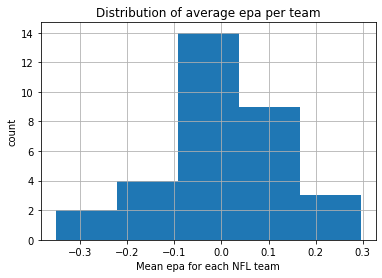

In [18]:
#epa as defined from the NFL Big Data Bowl at Kaggle.com: Expected points added on the play, relative to the offensive team. 
#Expected points is a metric that estimates the average of every next scoring outcome given the play's down, 
#distance, yardline, and time remaining (numeric)
# calculate the mean for each team and plot 
nflteam_avg_epa = plays_df.groupby(plays_df['possessionTeam'])['epa'].mean()
nflteam_avg_epa.hist(bins=5)
plt.title('Distribution of average epa per team')
plt.xlabel('Mean epa for each NFL team')
plt.ylabel('count');

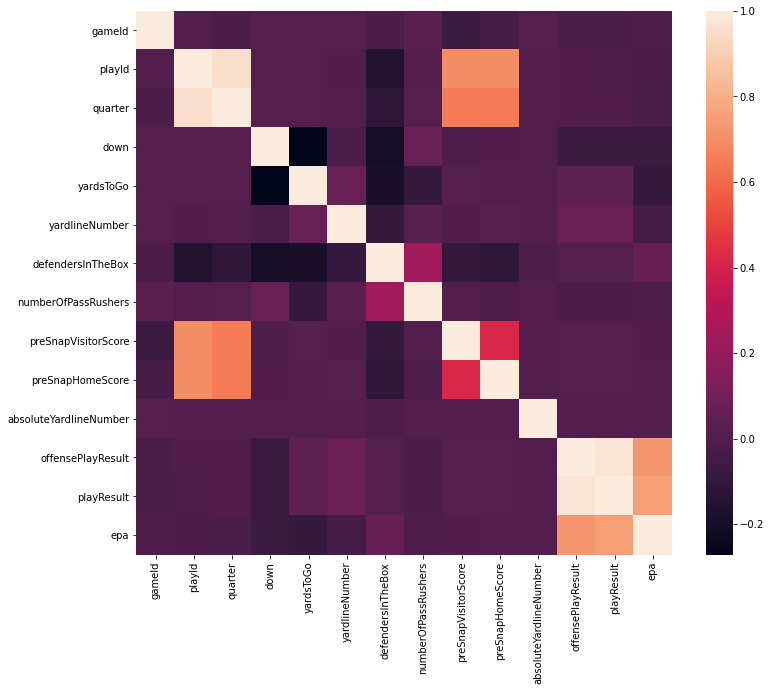

In [16]:
# Generate a heatmap from the cleaned data in order to determine what features to focus on for model building 
plt.subplots(figsize=(12,10))
sns.heatmap(plays_df.corr());

Based on the correlation from the heatmap, epa is very highly correlated with the playResult and offensePlayResult while being negatively correlated with down and yardsToGo.  Surprisngly defendersInTheBox and numberOfPassRushers had no impact on the epa, a further look at this will be needed.  From an intuitive perspective, these two categories should have a gretaer impact on the epa because the defensive formation should be vital to how successful an offensive play is.